# This is probably overfitting

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

In [ ]:
data = pd.read_csv(r'processed_data\preprocessed_training.csv')

In [11]:
data.shape

(64374, 23)

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold

# Assuming 'data' contains features and labels, split them first
X = data.drop(columns=["Churn"])  # Replace "Churn" with your actual target column
y = data["Churn"]

# First, create a holdout validation set (10% of the data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=None)

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store validation scores
fold_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Training Fold {fold + 1}/10")

    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Define a new model for each fold
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer for tabular data
        tf.keras.layers.Dense(64, activation='relu'), # Extra layer for better learning
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model on this fold
    history = model.fit(X_fold_train, y_fold_train,
                        validation_data=(X_fold_val, y_fold_val),
                        epochs=25, batch_size=32,
                        callbacks=[early_stopping], verbose=1)

    # Evaluate on validation fold
    val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    fold_accuracies.append(val_accuracy)

# Print average accuracy across folds
print(f"Average CV Accuracy: {sum(fold_accuracies) / len(fold_accuracies):.4f}")

Training Fold 1/10
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8461 - loss: 0.3329 - val_accuracy: 0.9201 - val_loss: 0.1786
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.1754 - val_accuracy: 0.9013 - val_loss: 0.2320
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9412 - loss: 0.1440 - val_accuracy: 0.9560 - val_loss: 0.1104
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9539 - loss: 0.1138 - val_accuracy: 0.9613 - val_loss: 0.1009
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9621 - loss: 0.0945 - val_accuracy: 0.9263 - val_loss: 0.1829
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9615 - loss: 0.0904 - val_accuracy: 0.9631 - val_loss: 0.0893
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.0802 - val_accuracy: 0.9676 - val_loss: 0.0773
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9688 - loss: 0.0775 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8273 - loss: 0.3667 - val_accuracy: 0.9272 - val_loss: 0.1791
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9272 - loss: 0.1747 - val_accuracy: 0.9268 - val_loss: 0.1615
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9458 - loss: 0.1369 - val_accuracy: 0.9562 - val_loss: 0.1098
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9525 - loss: 0.1159 - val_accuracy: 0.9520 - val_loss: 0.1054
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9604 - loss: 0.0997 - val_accuracy: 0.9620 - val_loss: 0.0896
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9608 - loss: 0.0934 - val_accuracy: 0.9679 - val_loss: 0.0794
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9636 - loss: 0.0855 - val_accuracy: 0.9686 - val_loss: 0.0756
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9684 - loss: 0.0771 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8329 - loss: 0.3508 - val_accuracy: 0.9360 - val_loss: 0.1705
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9276 - loss: 0.1764 - val_accuracy: 0.9244 - val_loss: 0.1616
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9442 - loss: 0.1402 - val_accuracy: 0.9579 - val_loss: 0.1075
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.1150 - val_accuracy: 0.9584 - val_loss: 0.1042
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9579 - loss: 0.1026 - val_accuracy: 0.9631 - val_loss: 0.0903
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9651 - loss: 0.0865 - val_accuracy: 0.9660 - val_loss: 0.0876
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9652 - loss: 0.0848 - val_accuracy: 0.9679 - val_loss: 0.0737
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9669 - loss: 0.0781 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8400 - loss: 0.3457 - val_accuracy: 0.9218 - val_loss: 0.1875
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9253 - loss: 0.1802 - val_accuracy: 0.9287 - val_loss: 0.1590
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9406 - loss: 0.1464 - val_accuracy: 0.9548 - val_loss: 0.1214
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9503 - loss: 0.1225 - val_accuracy: 0.9563 - val_loss: 0.1062
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9564 - loss: 0.1045 - val_accuracy: 0.9638 - val_loss: 0.0956
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9625 - loss: 0.0924 - val_accuracy: 0.9624 - val_loss: 0.0884
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9652 - loss: 0.0838 - val_accuracy: 0.9413 - val_loss: 0.1331
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9680 - loss: 0.0769 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8351 - loss: 0.3501 - val_accuracy: 0.8951 - val_loss: 0.2283
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9226 - loss: 0.1824 - val_accuracy: 0.9298 - val_loss: 0.1526
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9412 - loss: 0.1412 - val_accuracy: 0.9503 - val_loss: 0.1200
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9542 - loss: 0.1135 - val_accuracy: 0.9572 - val_loss: 0.1026
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9610 - loss: 0.0961 - val_accuracy: 0.9617 - val_loss: 0.0865
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9641 - loss: 0.0889 - val_accuracy: 0.9334 - val_loss: 0.1479
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.0841 - val_accuracy: 0.9622 - val_loss: 0.0836
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9666 - loss: 0.0787 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8255 - loss: 0.3750 - val_accuracy: 0.9296 - val_loss: 0.1722
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9291 - loss: 0.1714 - val_accuracy: 0.9486 - val_loss: 0.1395
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.1383 - val_accuracy: 0.9589 - val_loss: 0.1135
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9505 - loss: 0.1199 - val_accuracy: 0.9646 - val_loss: 0.0965
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9586 - loss: 0.1025 - val_accuracy: 0.9572 - val_loss: 0.0985
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.0907 - val_accuracy: 0.9689 - val_loss: 0.0803
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.0821 - val_accuracy: 0.9636 - val_loss: 0.0843
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9692 - loss: 0.0749 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8313 - loss: 0.3591 - val_accuracy: 0.9185 - val_loss: 0.1902
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9235 - loss: 0.1835 - val_accuracy: 0.9373 - val_loss: 0.1531
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9447 - loss: 0.1384 - val_accuracy: 0.9529 - val_loss: 0.1245
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9517 - loss: 0.1191 - val_accuracy: 0.9636 - val_loss: 0.1009
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9571 - loss: 0.1069 - val_accuracy: 0.9568 - val_loss: 0.1006
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.0945 - val_accuracy: 0.9655 - val_loss: 0.0866
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.0830 - val_accuracy: 0.9589 - val_loss: 0.0982
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.0800 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8385 - loss: 0.3451 - val_accuracy: 0.9247 - val_loss: 0.1852
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9290 - loss: 0.1727 - val_accuracy: 0.9404 - val_loss: 0.1487
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9444 - loss: 0.1387 - val_accuracy: 0.9539 - val_loss: 0.1203
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9511 - loss: 0.1191 - val_accuracy: 0.9499 - val_loss: 0.1274
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9592 - loss: 0.1001 - val_accuracy: 0.9522 - val_loss: 0.1064
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9634 - loss: 0.0890 - val_accuracy: 0.9581 - val_loss: 0.0925
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9647 - loss: 0.0858 - val_accuracy: 0.9660 - val_loss: 0.0861
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9675 - loss: 0.0781 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8328 - loss: 0.3526 - val_accuracy: 0.9185 - val_loss: 0.2041
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.1840 - val_accuracy: 0.9463 - val_loss: 0.1405
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9456 - loss: 0.1372 - val_accuracy: 0.9373 - val_loss: 0.1459
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9520 - loss: 0.1187 - val_accuracy: 0.9537 - val_loss: 0.1137
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1043 - val_accuracy: 0.9658 - val_loss: 0.0931
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.0908 - val_accuracy: 0.9662 - val_loss: 0.0892
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9670 - loss: 0.0809 - val_accuracy: 0.9527 - val_loss: 0.1122
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9692 - loss: 0.0763 - val_accura

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8289 - loss: 0.3609 - val_accuracy: 0.8904 - val_loss: 0.2452
Epoch 2/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9252 - loss: 0.1818 - val_accuracy: 0.9254 - val_loss: 0.1804
Epoch 3/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9453 - loss: 0.1404 - val_accuracy: 0.9482 - val_loss: 0.1191
Epoch 4/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9559 - loss: 0.1124 - val_accuracy: 0.9591 - val_loss: 0.1030
Epoch 5/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9590 - loss: 0.1019 - val_accuracy: 0.9474 - val_loss: 0.1139
Epoch 6/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.0900 - val_accuracy: 0.9546 - val_loss: 0.1011
Epoch 7/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.0820 - val_accuracy: 0.9639 - val_loss: 0.0832
Epoch 8/25
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9695 - loss: 0.0769 - val_accurac

In [ ]:
# Load the test dataset
test_data = pd.read_csv(r"processed_data\preprocessed_testing.csv")  # Replace with your actual test dataset path
X_test = test_data.drop(columns=["Churn"])
y_test = test_data["Churn"]

# Evaluate on the test set (which was never used in training)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


2012/2012 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9825 - loss: 0.0425

Final Test Accuracy: 0.9813


In [19]:
# Save the entire model (architecture + weights + optimizer state)
model.save("final_model.h5")
print("Model saved as final_model.h5")


Model saved as final_model.h5


2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


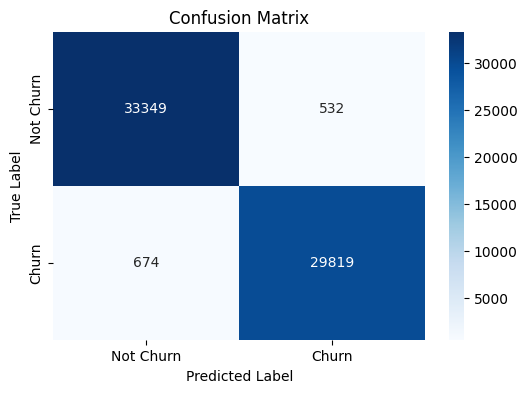

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     33881
           1       0.98      0.98      0.98     30493

    accuracy                           0.98     64374
   macro avg       0.98      0.98      0.98     64374
weighted avg       0.98      0.98      0.98     64374



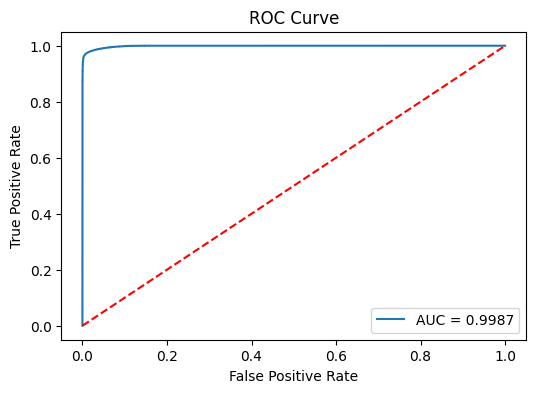

In [20]:
import numpy as np

# Get predicted probabilities (since last layer uses sigmoid, output is probability)
y_probs = model.predict(X_test)

# Convert probabilities to class labels (Threshold = 0.5)
y_pred = (y_probs > 0.5).astype("int32")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

# Print precision, recall, F1-score
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc

# Compute ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

